<a href="https://colab.research.google.com/github/AshwinPrasanth/intern/blob/main/Housing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

**LOADING DATASET**

In [ ]:
california_housing = fetch_california_housing()
data = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)

In [ ]:
data.shape

(20640, 9)

In [ ]:
print("Data set preview")
data.head()

Data set preview


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
print("Datatype Info\n")
print(data.dtypes)

Datatype Info

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
target        float64
dtype: object


In [ ]:
print("\nDataset dimension: ",data.shape)
print("\nMissing Value count:")
print(data.isnull().sum())


Dataset dimension:  (20640, 9)

Missing Value count:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


In [ ]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


**EXPLORATORY DATA ANALYSIS**

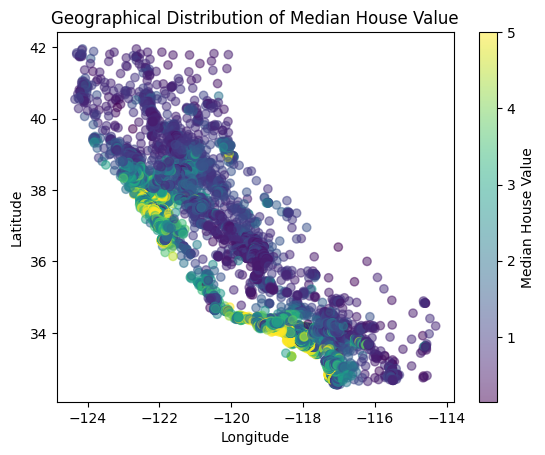

In [ ]:
plt.scatter(data['Longitude'], data['Latitude'], c=data['target'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Median House Value')
plt.show()

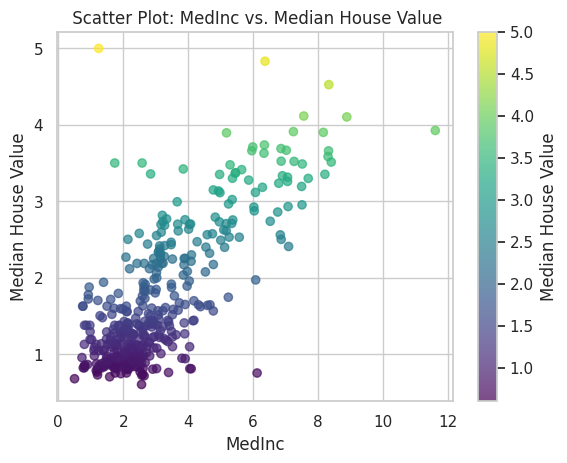

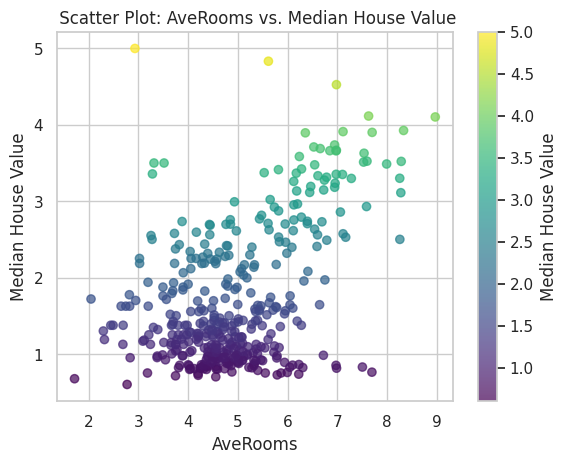

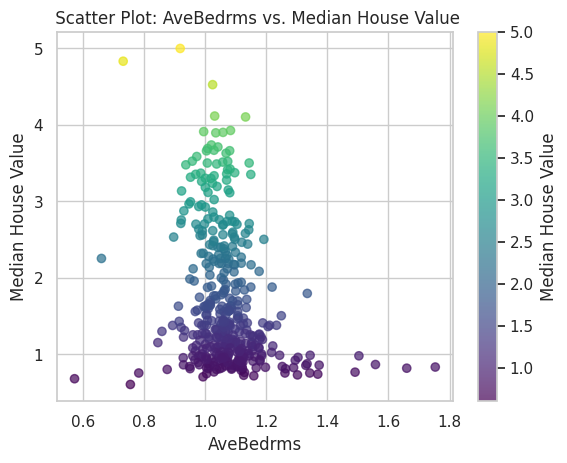

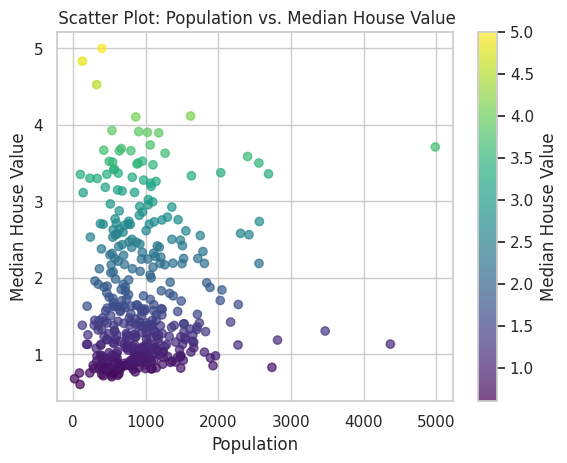

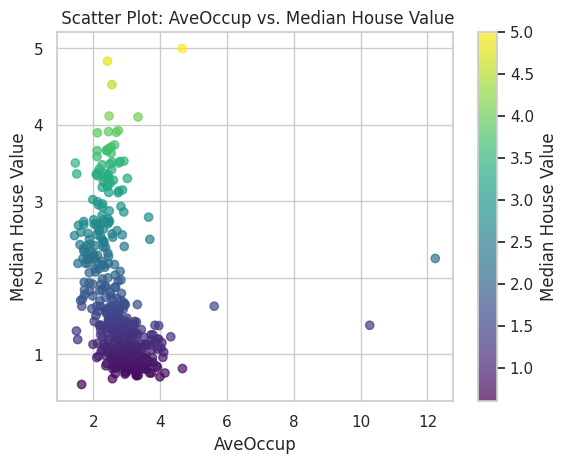

In [ ]:
features_of_interest = ['MedInc', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']
subset_data = data.head(400)
cmap = plt.get_cmap('viridis')
for feature in features_of_interest:
    plt.scatter(subset_data[feature], subset_data['target'], c=subset_data['target'], cmap=cmap, alpha=0.7)
    plt.colorbar(label='Median House Value')
    plt.xlabel(feature)
    plt.ylabel('Median House Value')
    plt.title(f' Scatter Plot: {feature} vs. Median House Value')
    plt.show()


In [ ]:
correlation_matrix = data.corr()
correlation_matrix

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


from matplotlib import pyplot as plt
correlation_matrix['MedInc'].plot(kind='hist', bins=20, title='MedInc')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
correlation_matrix['HouseAge'].plot(kind='hist', bins=20, title='HouseAge')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
correlation_matrix['AveRooms'].plot(kind='hist', bins=20, title='AveRooms')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
correlation_matrix['AveBedrms'].plot(kind='hist', bins=20, title='AveBedrms')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
correlation_matrix.plot(kind='scatter', x='MedInc', y='HouseAge', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
correlation_matrix.plot(kind='scatter', x='HouseAge', y='AveRooms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
correlation_matrix.plot(kind='scatter', x='AveRooms', y='AveBedrms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
correlation_matrix.plot(kind='scatter', x='AveBedrms', y='Population', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
correlation_matrix['MedInc'].plot(kind='line', figsize=(8, 4), title='MedInc')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
correlation_matrix['HouseAge'].plot(kind='line', figsize=(8, 4), title='HouseAge')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
correlation_matrix['AveRooms'].plot(kind='line', figsize=(8, 4), title='AveRooms')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
correlation_matrix['AveBedrms'].plot(kind='line', figsize=(8, 4), title='AveBedrms')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
import seaborn as sns

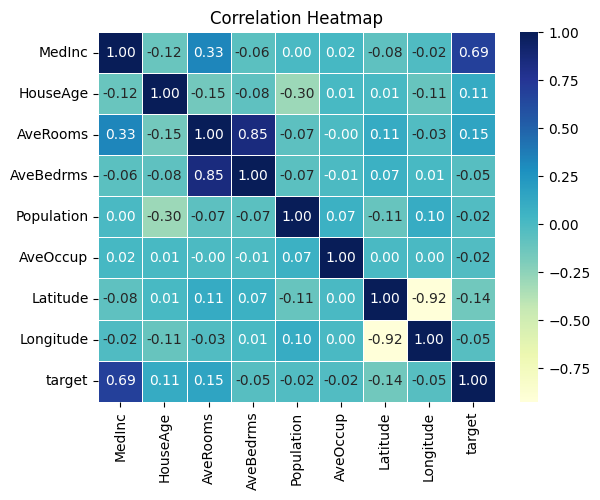

In [ ]:
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

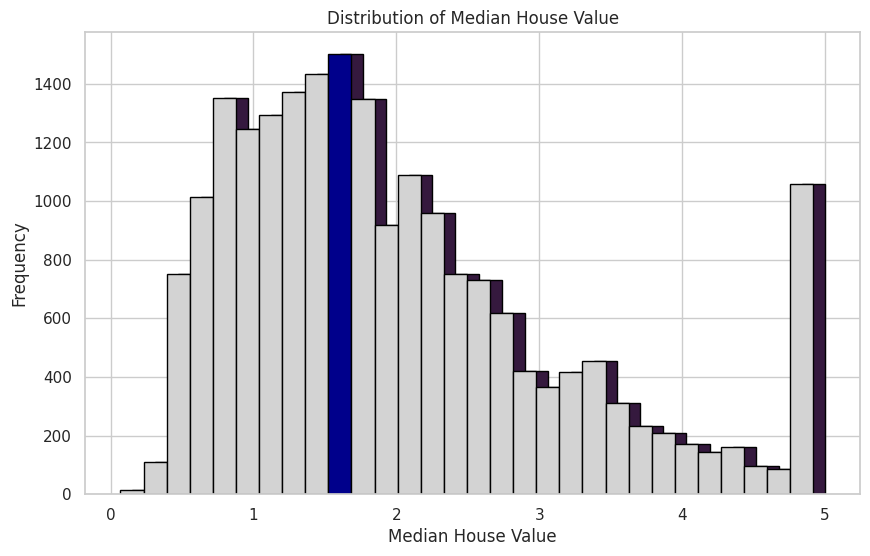

In [ ]:
plt.figure(figsize=(10, 6))
hist, edges, _ = plt.hist(data['target'], bins=30, edgecolor='black')
max_freq_index = np.argmax(hist)
colors = ['lightgray' if i != max_freq_index else 'darkblue' for i in range(len(hist))]
plt.bar(edges[:-1], hist, width=np.diff(edges), color=colors, edgecolor='black')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.title('Distribution of Median House Value')

plt.show()

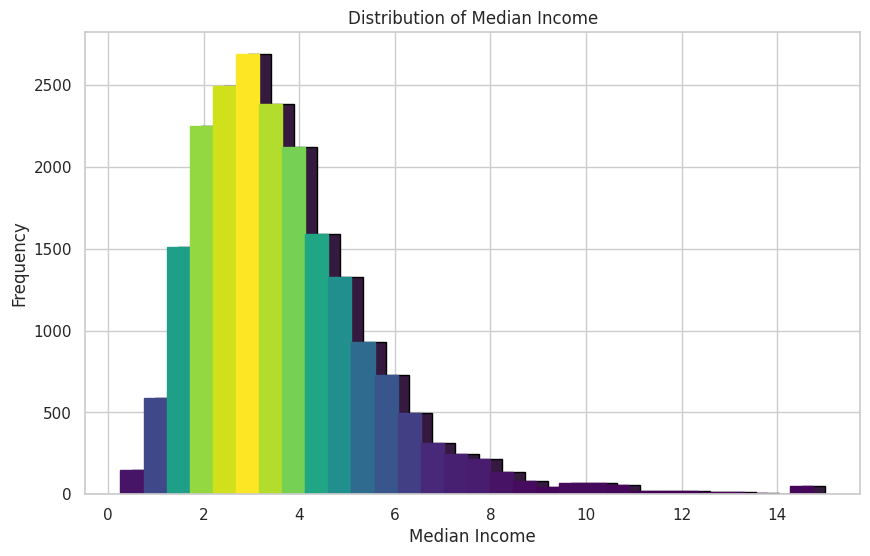

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 6))
hist, edges, _ = plt.hist(data['MedInc'], bins=30, edgecolor='black')
normalized_freq = (hist - np.min(hist)) / (np.max(hist) - np.min(hist))
colors = plt.cm.viridis(normalized_freq)
plt.bar(edges[:-1], hist, width=np.diff(edges), color=colors, edgecolor=colors)
plt.xlabel('Median Income')
plt.ylabel('Frequency')
plt.title('Distribution of Median Income')

plt.show()


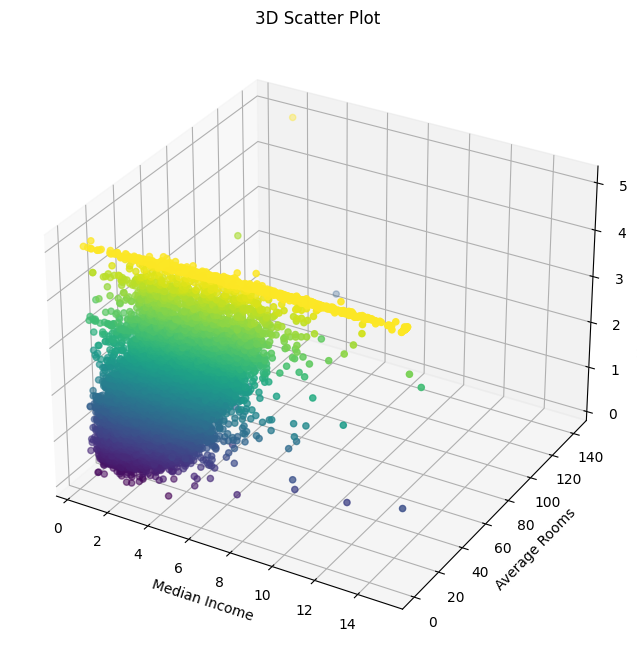

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['MedInc'], data['AveRooms'], data['target'], c=data['target'], cmap='viridis')
ax.set_xlabel('Median Income')
ax.set_ylabel('Average Rooms')
ax.set_zlabel('Median House Value')
plt.title('3D Scatter Plot')
plt.show()


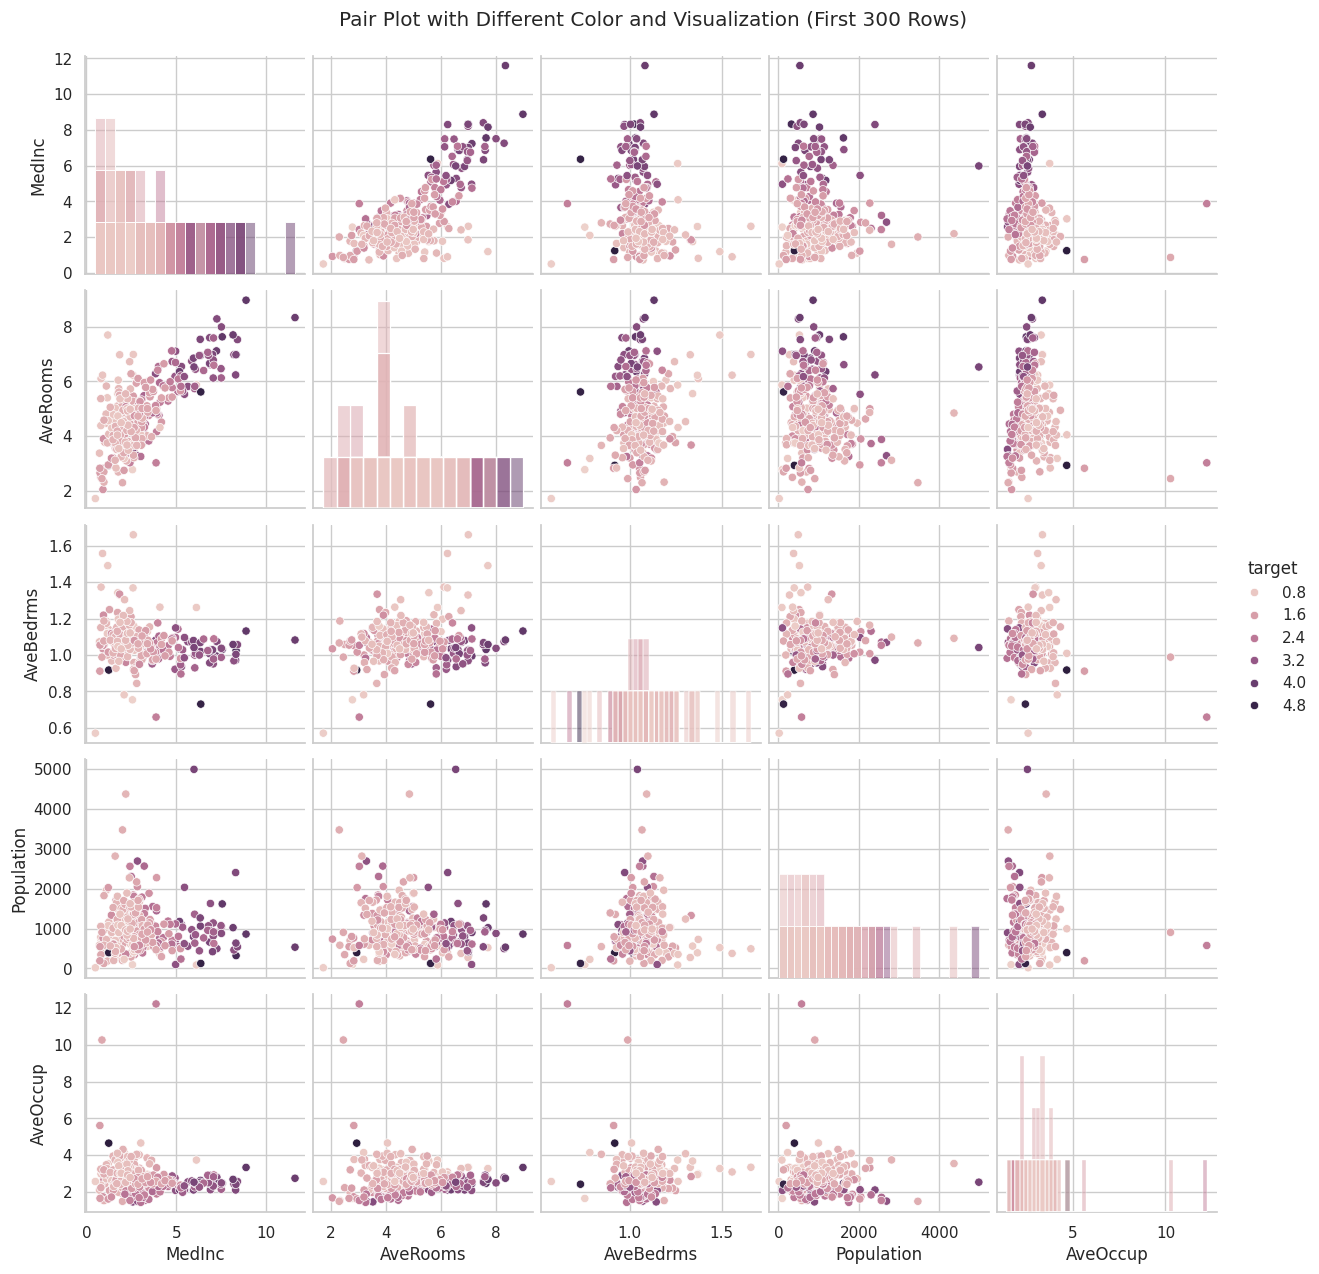

In [ ]:
import seaborn as sns

features_subset = ['MedInc', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'target']
subset_data = data.head(300)[features_subset]
sns.set(style='whitegrid', palette='rocket')
pair_plot = sns.pairplot(subset_data, hue='target', markers='o', diag_kind='hist', height=2.5)
pair_plot.fig.suptitle('Pair Plot with Different Color and Visualization (First 300 Rows)', y=1.02)
plt.show()

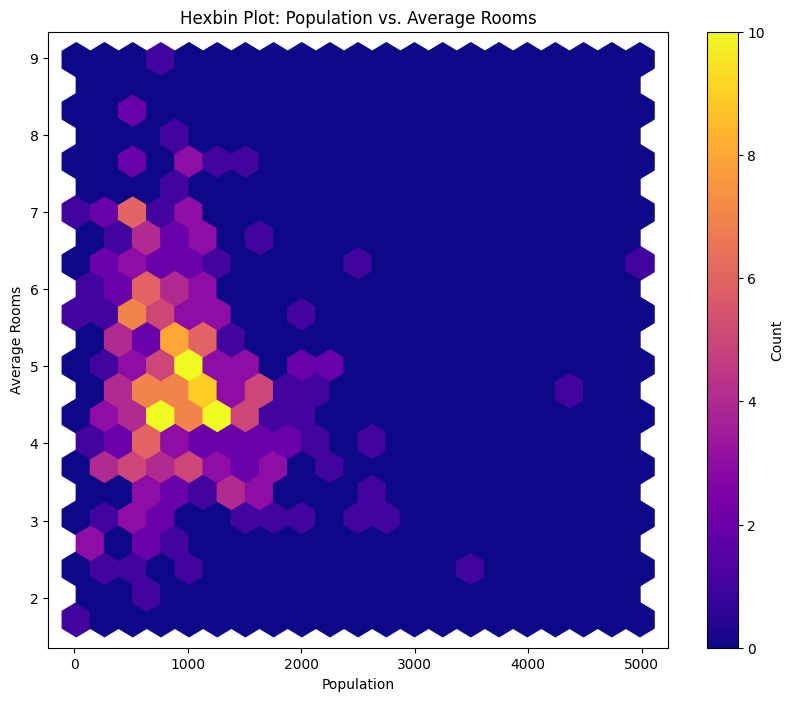

In [ ]:
plt.figure(figsize=(10, 8))
plt.hexbin(data.head(300)['Population'], data.head(300)['AveRooms'], gridsize=20, cmap='plasma')
plt.xlabel('Population')
plt.ylabel('Average Rooms')
plt.title('Hexbin Plot: Population vs. Average Rooms')
plt.colorbar(label='Count')
plt.show()

In [ ]:
data['target'] = california_housing.target
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**DATA TRANSFORMATON**

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**DL MODEL BUILDING**

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

**MODEL TRAINING**

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2, verbose=1)

Epoch 1/50
413/413 [==============================] - 3s 4ms/step - loss: 0.8605 - val_loss: 0.4762
Epoch 2/50
413/413 [==============================] - 2s 4ms/step - loss: 0.4104 - val_loss: 0.4158
Epoch 3/50
413/413 [==============================] - 3s 6ms/step - loss: 0.3823 - val_loss: 0.3858
Epoch 4/50
413/413 [==============================] - 1s 4ms/step - loss: 0.3655 - val_loss: 0.3813
Epoch 5/50
413/413 [==============================] - 1s 3ms/step - loss: 0.3424 - val_loss: 0.3722
Epoch 6/50
413/413 [==============================] - 1s 3ms/step - loss: 0.3294 - val_loss: 0.3519
Epoch 7/50
413/413 [==============================] - 1s 3ms/step - loss: 0.3180 - val_loss: 0.3549
Epoch 8/50
413/413 [==============================] - 1s 3ms/step - loss: 0.3131 - val_loss: 0.3316
Epoch 9/50
413/413 [==============================] - 1s 3ms/step - loss: 0.3068 - val_loss: 0.3479
Epoch 10/50
413/413 [==============================] - 1s 3ms/step - loss: 0.3022 - val_loss: 0.3376

**MODEL VALIDATION**

In [ ]:
accuracy = r2_score(y_test, y_pred)
loss = history.history['loss'][-1]
mse = mean_squared_error(y_test, y_pred)

print(f'R2 Score (Accuracy): {accuracy}')
print(f'Final Training Loss: {loss}')
print(f'Mean Squared Error on Test Set: {mse}')

R2 Score (Accuracy): 0.7881929307081704
Final Training Loss: 0.25125283002853394
Mean Squared Error on Test Set: 0.2775538852549059


**MACHINE LEARNING MODEL**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

model = RandomForestRegressor(n_estimators=100, random_state=42)

cv_scores = cross_val_score(model, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=5)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Cross-Validation Scores (Negative MSE): {cv_scores}')
print(f'Mean Cross-Validation Score: {np.mean(cv_scores)}')
print(f'Mean Squared Error on Test Set: {mse}')
print(f'R-squared on Test Set: {r2}')


Cross-Validation Scores (Negative MSE): [-0.26145796 -0.26718325 -0.25820499 -0.25528529 -0.26591162]
Mean Cross-Validation Score: -0.2616086220023904
Mean Squared Error on Test Set: 0.255169737347244
R-squared on Test Set: 0.8052747336256919


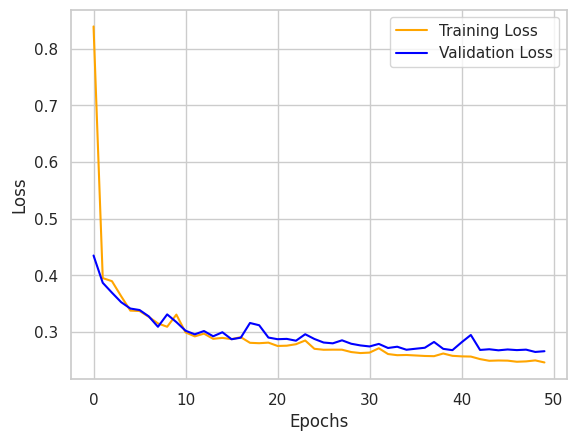

In [ ]:
plt.plot(history.history['loss'], label='Training Loss', color='orange')
plt.plot(history.history['val_loss'], label='Validation Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


**PRICE PREDICTION ON GENERALIZED DATA**

1/1 [==============================] - 0s 49ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Predicted Values for 20 Custom Data:
Sample 1: 324.3082580566406
Sample 2: 318.2561340332031
Sample 3: 343.3305969238281
Sample 4: 166.53372192382812
Sample 5: 140.92730712890625
Sample 6: 23.501323699951172
Sample 7: 353.3417053222656
Sample 8: 217.5845489501953
Sample 9: 32.30266571044922
Sample 10: 360.0736389160156
Sample 11: 204.20986938476562
Sample 12: 112.9854507446289
Sample 13: -20.133800506591797
Sample 14: 401.3746032714844
Sample 15: 412.4117736816406
Sample 16: 103.09253692626953
Sample 17: 107.59171295166016
Sample 18: 108.11046600341797
Sample 19: 57.311344146728516
Sample 20: 75.63568878173828


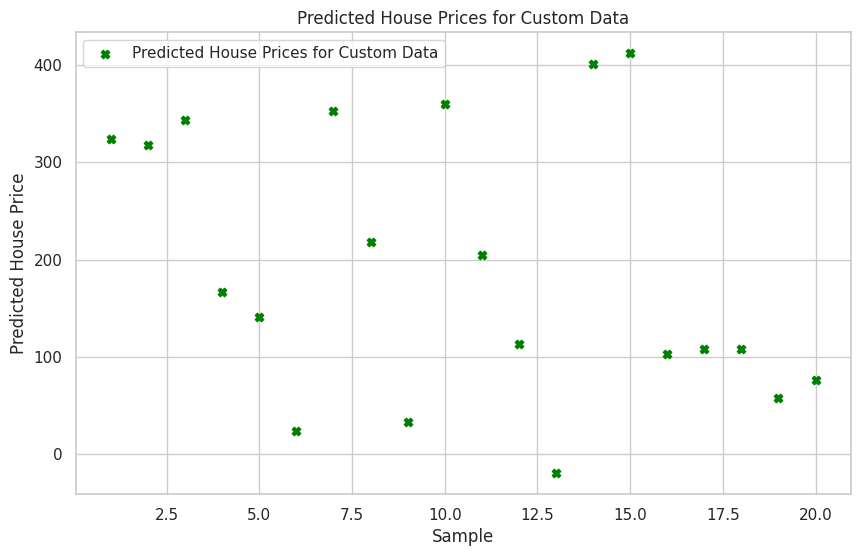

In [ ]:
def preprocess_input(new_data, scaler):
    new_data_scaled = scaler.transform(new_data)
    return new_data_scaled

custom_values = np.random.rand(20, 8) * np.array([10, 10, 5, 2000, 10, 5, 10, 5])
custom_values_scaled = preprocess_input(custom_values, scaler)
predictions_custom = model.predict(custom_values_scaled)

print("Predicted Values for 20 Custom Data:")
for i, prediction in enumerate(predictions_custom):
    print(f"Sample {i+1}: {prediction[0]}")

plt.figure(figsize=(10, 6))
plt.scatter(range(1, 21), predictions_custom, color='green', marker='X', label='Predicted House Prices for Custom Data')
plt.xlabel('Sample')
plt.ylabel('Predicted House Price')
plt.title('Predicted House Prices for Custom Data')
plt.legend()
plt.show()
